# 1. Setting Up

## 1.1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Uncomment the following cell if using Google Colab:

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# FILEPATH = '/content/drive/MyDrive/COMP562/lifeexpectancy.csv'

Mounted at /content/drive


If running locally:

In [ ]:
import os
import sys

FILEPATH = os.path.join(sys.path[0], "lifeexpectancy.csv")

## 1.2. Loading Data

In [ ]:
original_df = pd.read_csv(FILEPATH)
original_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# 2. Data pre-processing

## 2.1 Clean data

We drop columns that contain too many NaN values and subsequently, rows that contain NaN values.

We drop `Population` and `Hepatitis B` because it contains **652** NaNs (22.2%) and **553** NaNs (18.8%) respectively.

In [ ]:
for i in original_df.columns:
  if original_df[i].isna().sum() == 0: continue
  print(original_df[i].isna().sum(), "\t", i)

# Drop "Population" and "Hepatitis B"
df = original_df.drop(['Population', 'Hepatitis B'], axis=1)
# Drop rows containing NaNs
df = df.dropna()

print(f'\nOriginal data: {len(original_df)} rows')
print(f'Final data: {len(df)} rows\t(Dropped {len(original_df)-len(df)} rows)')

10 	 Life expectancy 
10 	 Adult Mortality
194 	 Alcohol
553 	 Hepatitis B
34 	  BMI 
19 	 Polio
226 	 Total expenditure
19 	 Diphtheria 
448 	 GDP
652 	 Population
34 	  thinness  1-19 years
34 	  thinness 5-9 years
167 	 Income composition of resources
163 	 Schooling

Original data: 2938 rows
Final data: 2301 rows	(Dropped 637 rows)


Clean the data to strip any trailing and leading spaces in the headers and column values

In [ ]:
df = df.rename(columns=lambda x: x.strip())
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

## 2.2 Find correlations for each feature

As we have 19 features (columns), we aim to select only the features that best correlate to `Life expectancy`, the variable we are trying to predict. We separate the features into **numerical** and **categorical** data, and set the threshold at **0.5**.

The numerical data returns 5 features, while the categorical data returns 0 features. As such, we will disregard the **categorical** data and focus on **numerical** data.





Correlation values for numerical:
                                 Correlation value
Life expectancy                           1.000000
Adult Mortality                          -0.682251
BMI                                       0.580238
HIV/AIDS                                 -0.576673
Income composition of resources           0.732483
Schooling                                 0.762223

Correlation values for categorical:
                 Correlation value
Life expectancy                1.0


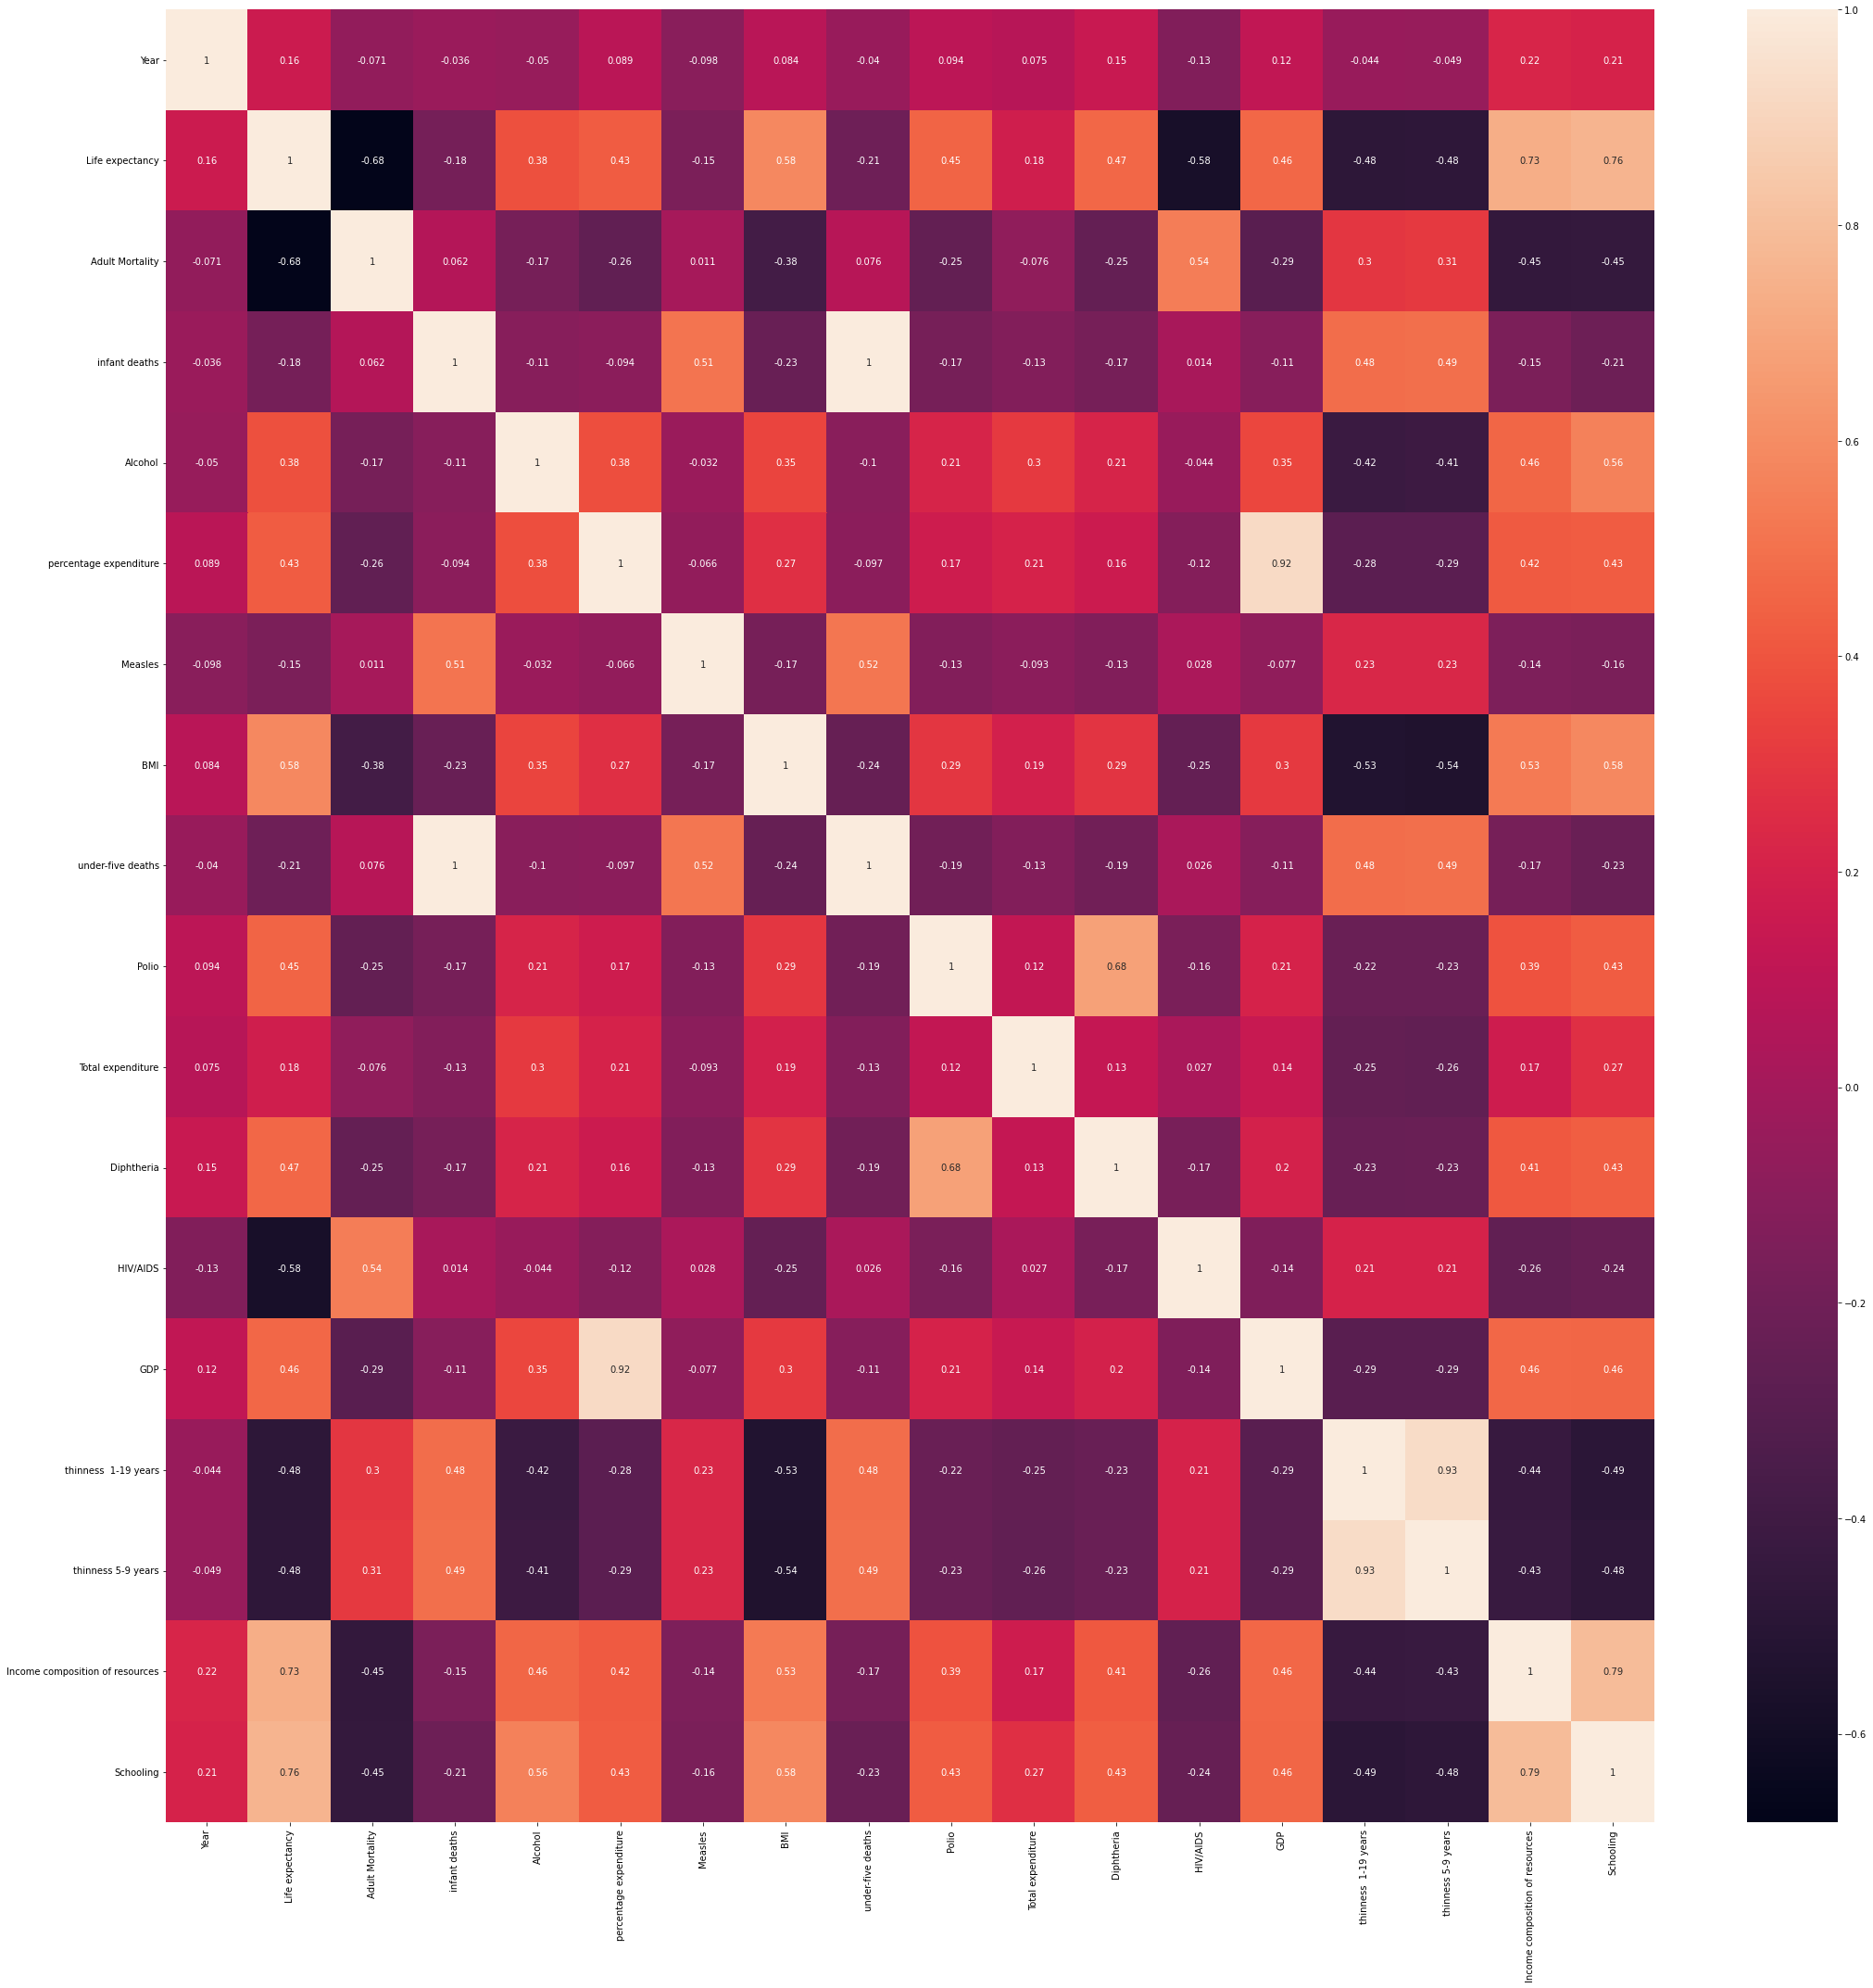

In [ ]:
from sklearn.preprocessing import LabelEncoder

def get_column_correlations_above_threshold(label_col, threshold): 
  feature = [index for index in label_col.index if abs(label_col[index]) > threshold]
  value = [val for val in label_col if abs(val) > threshold]

  df = pd.DataFrame(data = value, index = feature, columns=['Correlation value'])
  return df

# Select a threshold value
THRESHOLD = 0.5

# Separate data into numerical and categorical data
num_df = df.select_dtypes(exclude=['object'])
cat_df = df.drop(num_df, axis=1)

cormap = num_df.corr()
fig, ax = plt.subplots(figsize=(36,36))
sns.heatmap(cormap, annot = True)

top_corelated_values_num = get_column_correlations_above_threshold(cormap['Life expectancy'], THRESHOLD)
print("Correlation values for numerical:")
print(top_corelated_values_num)

# Encode categorical variables to find the correlation
cat_col = cat_df.columns
for i in cat_col:
    enc = LabelEncoder()
    cat_df[i] = enc.fit_transform(cat_df[i].astype('str'))

cat_df['Life expectancy'] = df['Life expectancy']
cormat = cat_df.corr()

top_corelated_values_cat = get_column_correlations_above_threshold(cormat['Life expectancy'], THRESHOLD)
print("\nCorrelation values for categorical:")
print(top_corelated_values_cat)

In [ ]:
features = df[['Adult Mortality', 'BMI', 'HIV/AIDS', 'Income composition of resources', 'Schooling']]
labels = df['Life expectancy']

Scale the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
features.head()

,Adult Mortality,BMI,HIV/AIDS,Income composition of resources,Schooling
0,0.362881,0.233818,0.0,0.506878,0.487923
1,0.373961,0.227213,0.0,0.503704,0.483092
2,0.369806,0.220608,0.0,0.497354,0.478261
3,0.375346,0.214003,0.0,0.489947,0.473430
4,0.379501,0.208719,0.0,0.480423,0.458937


## 2.3 Summary of final data

In [ ]:
features.describe()

,Adult Mortality,BMI,HIV/AIDS,Income composition of resources,Schooling
count,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000
mean,0.222492,0.484498,0.037203,0.667304,0.585471
std,0.177156,0.261739,0.111479,0.225436,0.159557
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.094183,0.231176,0.000000,0.519577,0.487923
50%,0.189751,0.556143,0.000000,0.722751,0.599034
75%,0.308864,0.719947,0.015842,0.832804,0.695652
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
labels.describe()

count    2301.000000
mean       69.321730
std         9.708133
min        36.300000
25%        63.200000
50%        72.200000
75%        76.000000
max        89.000000
Name: Life expectancy, dtype: float64

## 2.4 Splitting into train and test data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)

# 3. Machine Learning and Prediction

## 3.0 Utility functions and variables

Results presentation

In [ ]:
col_names = ['mean_absolute_error', 'mean_squared_error', 'root_mean_squared_error']
model_comparison_results = pd.DataFrame(columns=col_names)

Metrics presentation functions

In [ ]:
from sklearn import metrics

def get_error_values(y_test, predictions):
  mean_absolute_error = metrics.mean_absolute_error(y_test, predictions)
  mean_squared_error = metrics.mean_squared_error(y_test, predictions)
  root_mean_squared_error = np.sqrt(mean_squared_error)
  return mean_absolute_error, mean_squared_error, root_mean_squared_error

def print_error_values(mean_absolute_error, mean_squared_error, root_mean_squared_error):
  print('Mean Absolute Error:', mean_absolute_error)  
  print('Mean Squared Error:', mean_squared_error)  
  print('Root Mean Squared Error:', root_mean_squared_error)
  print(f'\nRoot mean squared error is {100*root_mean_squared_error/labels.mean()}% of the mean')

def get_and_print_error_values(y_test, predictions, labels, model_name):
  errors = get_error_values(y_test, predictions)
  model_comparison_results.loc[model_name] = errors
  print_error_values(*errors)

## 3.1 Linear regression

### Train the model and make prediction

In [ ]:
from sklearn.linear_model import LinearRegression

# Train the model

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Make predictions

linear_regression_pred = linear_regression_model.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': linear_regression_pred})
pred_df.head()

,Actual,Predicted
887,61.8,60.149720
863,58.5,50.829323
2925,56.6,55.439465
2317,82.2,78.528057
660,78.7,77.821783


### Evaluate model performance

In [ ]:
get_and_print_error_values(y_test, linear_regression_pred, labels, 'Linear Regression')

Mean Absolute Error: 3.1616287466370916
Mean Squared Error: 19.306070074367028
Root Mean Squared Error: 4.393867325530782

Root mean squared error is 6.338369434287738% of the mean


## 3.2 Ridge Regression

### Train the model and make prediction

In [ ]:
from sklearn.linear_model import RidgeCV

# Train the model
ridge_regression_model = RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10]) 
ridge_regression_model.fit(X_train, y_train)

# Make predictions
ridge_regression_pred = ridge_regression_model.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': ridge_regression_pred})
pred_df.head()

,Actual,Predicted
887,61.8,60.147852
863,58.5,50.823647
2925,56.6,55.441943
2317,82.2,78.525679
660,78.7,77.813132


### Evaluate model performance

In [ ]:
get_and_print_error_values(y_test, ridge_regression_pred, labels, 'Ridge Regression')

Mean Absolute Error: 3.1586906549643716
Mean Squared Error: 19.268365290478293
Root Mean Squared Error: 4.389574613841106

Root mean squared error is 6.332176986826715% of the mean


## 3.3 Support Vector Regressor

### 3.3.1 Linear kernel

### Train the model and make prediction

In [ ]:
from sklearn.svm import SVR

# Train the model
svr_model_linear = SVR(kernel='linear')   # using Radial Basis Function kernel
svr_model_linear.fit(X_train, y_train)

# Make predictions
svr_pred_linear = svr_model_linear.predict(X_test)

pred_df_linear = pd.DataFrame({'Actual': y_test, 'Predicted': svr_pred_linear})
pred_df_linear.head()

,Actual,Predicted
887,61.8,60.049975
863,58.5,49.507030
2925,56.6,55.613950
2317,82.2,79.594116
660,78.7,77.027347


### Evaluate model performance

In [ ]:
get_and_print_error_values(y_test, svr_pred_linear, labels, 'SVG (linear)')

Mean Absolute Error: 2.981414941073518
Mean Squared Error: 18.312693051703828
Root Mean Squared Error: 4.2793332484983955

Root mean squared error is 6.173148402503684% of the mean


### 3.3.2 RBF kernel

### Train the model and make prediction

In [ ]:
from sklearn.svm import SVR

# Train the model
svr_model_rbf = SVR(kernel='rbf')   # using Radial Basis Function kernel
svr_model_rbf.fit(X_train, y_train)

# Make predictions
svr_pred_rbf = svr_model_rbf.predict(X_test)

pred_df_rbf = pd.DataFrame({'Actual': y_test, 'Predicted': svr_pred_rbf})
pred_df_rbf.head()

,Actual,Predicted
887,61.8,58.484131
863,58.5,55.755647
2925,56.6,53.651301
2317,82.2,80.898917
660,78.7,76.561812


### Evaluate model performance

In [ ]:
get_and_print_error_values(y_test, svr_pred_rbf, labels, 'SVG (RBF)')

Mean Absolute Error: 2.398488223311078
Mean Squared Error: 11.524467027226427
Root Mean Squared Error: 3.394770541174532

Root mean squared error is 4.897123249392105% of the mean


## 3.4 Random Forest

### Train the model and make prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def pred_from_random_forest_with_n_trees(n):
  # Train the model
  random_forest_model = RandomForestRegressor(n_estimators = n) 
  random_forest_model.fit(X_train, y_train)
  # Make predictions
  random_forest_pred = random_forest_model.predict(X_test)
  return random_forest_pred


### Relationship between number of trees and mean squared error

In [ ]:
num_trees = [i for i in range(50, 550, 50)]
ITERATIONS = 20
total_absolute_squared_error = [0]*len(num_trees)
total_mean_squared_error = [0]*len(num_trees)
total_root_mean_squared_error = [0]*len(num_trees)

for _ in range(ITERATIONS):
  results = []
  for i, num in enumerate(num_trees):
    predictions = pred_from_random_forest_with_n_trees(num)
    absolute_squared_error, mean_squared_error, root_mean_squared_error = get_error_values(y_test, predictions)
    total_absolute_squared_error[i] += absolute_squared_error
    total_mean_squared_error[i] += mean_squared_error
    total_root_mean_squared_error[i] += root_mean_squared_error

average_absolute_squared_error = [n/ITERATIONS for n in total_absolute_squared_error]
average_mean_squared_error = [n/ITERATIONS for n in total_mean_squared_error]
average_root_mean_squared_error = [n/ITERATIONS for n in total_root_mean_squared_error]

[1.9329494334518418, 1.9343915508369054, 1.9307472161108894, 1.9265704918086441, 1.925181778317445, 1.9256047014158106, 1.9263840935093808, 1.9243830296738653, 1.9241640033472496, 1.925061894476444]


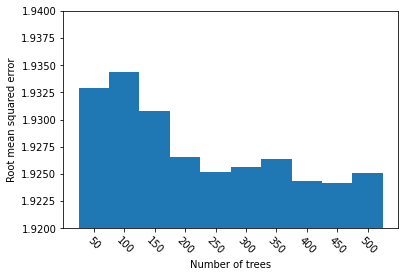

In [ ]:
# Plot root mean squared error against number of trees
import math
xs = np.arange(len(num_trees)) 
print(average_root_mean_squared_error)
plt.bar(xs, average_root_mean_squared_error, 1, align='center')
plt.xticks(xs, num_trees) 
plt.xticks(rotation=-45)
plt.ylim([math.floor(100*min(average_root_mean_squared_error))/100, math.ceil(100*max(average_root_mean_squared_error))/100])
plt.ylabel('Root mean squared error')
plt.xlabel('Number of trees')
plt.show()

In [ ]:
index_min = np.argmin(average_root_mean_squared_error)
optimal_number_of_trees = num_trees[index_min]

print("Optimal number of trees:" + str(optimal_number_of_trees))

Optimal number of trees:450


In [ ]:
random_forest_pred = pred_from_random_forest_with_n_trees(optimal_number_of_trees)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': random_forest_pred})
pred_df.head()

,Actual,Predicted
887,61.8,60.329556
863,58.5,57.836444
2925,56.6,54.367556
2317,82.2,82.271333
660,78.7,77.896667


### Evaluate model performance

In [ ]:
print(f"For {optimal_number_of_trees} trees:")
errors = average_absolute_squared_error[index_min], average_mean_squared_error[index_min], average_root_mean_squared_error[index_min]
print_error_values(*errors)
model_comparison_results.loc['Random Forest'] = errors

For 450 trees:
Mean Absolute Error: 1.2708035430224078
Mean Squared Error: 3.702472006603967
Root Mean Squared Error: 1.9241640033472496

Root mean squared error is 2.7757010855806037% of the mean


## 3.5 Neural Network

### Install packages

In [ ]:
import sys
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install tensorflow

### Train the model and make prediction

In [ ]:
# Model Creation

from keras.models import Sequential
from keras.layers import Dense

# Create the model
nn_model = Sequential()
nn_model.add(Dense(25, input_dim=5, kernel_initializer='normal', activation='relu'))
nn_model.add(Dense(15, kernel_initializer='normal', activation='relu'))
nn_model.add(Dense(1, kernel_initializer='normal'))
nn_model.compile(loss='mean_squared_error', optimizer='adam')

nn_model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

nn_pred = nn_model.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': nn_pred.flatten()})
pred_df.head()

15/15 [==============================] - 0s 2ms/step


,Actual,Predicted
887,61.8,60.121758
863,58.5,50.334675
2925,56.6,55.666248
2317,82.2,78.885101
660,78.7,78.111565


### Evaluate model performance

In [ ]:
# with 1 hidden layer
get_and_print_error_values(y_test, nn_pred, labels, 'Neural Network')

Mean Absolute Error: 3.155437029261392
Mean Squared Error: 19.008824839278883
Root Mean Squared Error: 4.359911104515651

Root mean squared error is 6.289385917617665% of the mean


# 4. Results summary

## 4.1 Summary of mean errors

In [ ]:
model_comparison_results = model_comparison_results.sort_values('root_mean_squared_error')
display(model_comparison_results)

,mean_absolute_error,mean_squared_error,root_mean_squared_error
Random Forest,1.270804,3.702472,1.924164
SVG (RBF),2.398488,11.524467,3.394771
SVG (linear),2.981415,18.312693,4.279333
Neural Network,3.155437,19.008825,4.359911
Ridge Regression,3.158691,19.268365,4.389575
Linear Regression,3.161629,19.306070,4.393867


Scaled to the mean life expectancy:

In [ ]:
mean = labels.mean()
scaled_model_comparison_results = model_comparison_results.applymap(lambda x: 100*x/mean)
display(scaled_model_comparison_results)

,mean_absolute_error,mean_squared_error,root_mean_squared_error
Random Forest,1.833197,5.340998,2.775701
SVG (RBF),3.459937,16.624610,4.897123
SVG (linear),4.300837,26.416959,6.173148
Neural Network,4.551873,27.421164,6.289386
Ridge Regression,4.556566,27.795563,6.332177
Linear Regression,4.560805,27.849954,6.338369


## 4.2 Results visualisation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


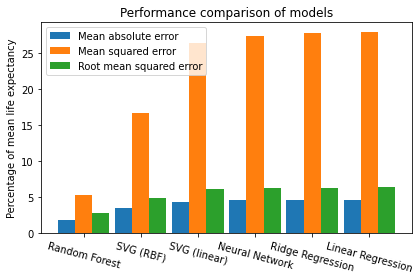

In [ ]:
models = list(scaled_model_comparison_results.index)

mean_absolute_error = scaled_model_comparison_results['mean_absolute_error']
mean_squared_error = scaled_model_comparison_results['mean_squared_error']
root_mean_squared_error = scaled_model_comparison_results['root_mean_squared_error']

x = np.arange(len(models))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, mean_absolute_error, width, label='Mean absolute error')
rects2 = ax.bar(x, mean_squared_error, width, label='Mean squared error')
rects3 = ax.bar(x + width, root_mean_squared_error, width, label='Root mean squared error')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of mean life expectancy')
ax.set_title('Performance comparison of models')
ax.set_xticks(x, models)
ax.legend()

plt.xticks(x, models)
plt.xticks(rotation=-15)

fig.tight_layout()

plt.show()